# Ames
___
## Imports / Reads

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
pd.set_option('display.max_columns', 100)

In [3]:
df = pd.read_csv('../../Data/Ames/train.csv')
test_df = pd.read_csv('../../Data/Ames/test.csv')

___
## Cleaning

In [4]:
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [5]:
df.shape

(2051, 81)

In [6]:
columns = set(df.columns)
columns

{'1st Flr SF',
 '2nd Flr SF',
 '3Ssn Porch',
 'Alley',
 'Bedroom AbvGr',
 'Bldg Type',
 'Bsmt Cond',
 'Bsmt Exposure',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Bsmt Qual',
 'Bsmt Unf SF',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Central Air',
 'Condition 1',
 'Condition 2',
 'Electrical',
 'Enclosed Porch',
 'Exter Cond',
 'Exter Qual',
 'Exterior 1st',
 'Exterior 2nd',
 'Fence',
 'Fireplace Qu',
 'Fireplaces',
 'Foundation',
 'Full Bath',
 'Functional',
 'Garage Area',
 'Garage Cars',
 'Garage Cond',
 'Garage Finish',
 'Garage Qual',
 'Garage Type',
 'Garage Yr Blt',
 'Gr Liv Area',
 'Half Bath',
 'Heating',
 'Heating QC',
 'House Style',
 'Id',
 'Kitchen AbvGr',
 'Kitchen Qual',
 'Land Contour',
 'Land Slope',
 'Lot Area',
 'Lot Config',
 'Lot Frontage',
 'Lot Shape',
 'Low Qual Fin SF',
 'MS SubClass',
 'MS Zoning',
 'Mas Vnr Area',
 'Mas Vnr Type',
 'Misc Feature',
 'Misc Val',
 'Mo Sold',
 'Neighborhood',
 'Open Porch SF',
 'Overall Cond',
 'Overall

___
### Missing Data

In [7]:
df.isnull().sum().sort_values(ascending=False)

Pool QC         2042
Misc Feature    1986
Alley           1911
Fence           1651
Fireplace Qu    1000
                ... 
Electrical         0
Central Air        0
Heating QC         0
Sale Type          0
Id                 0
Length: 81, dtype: int64

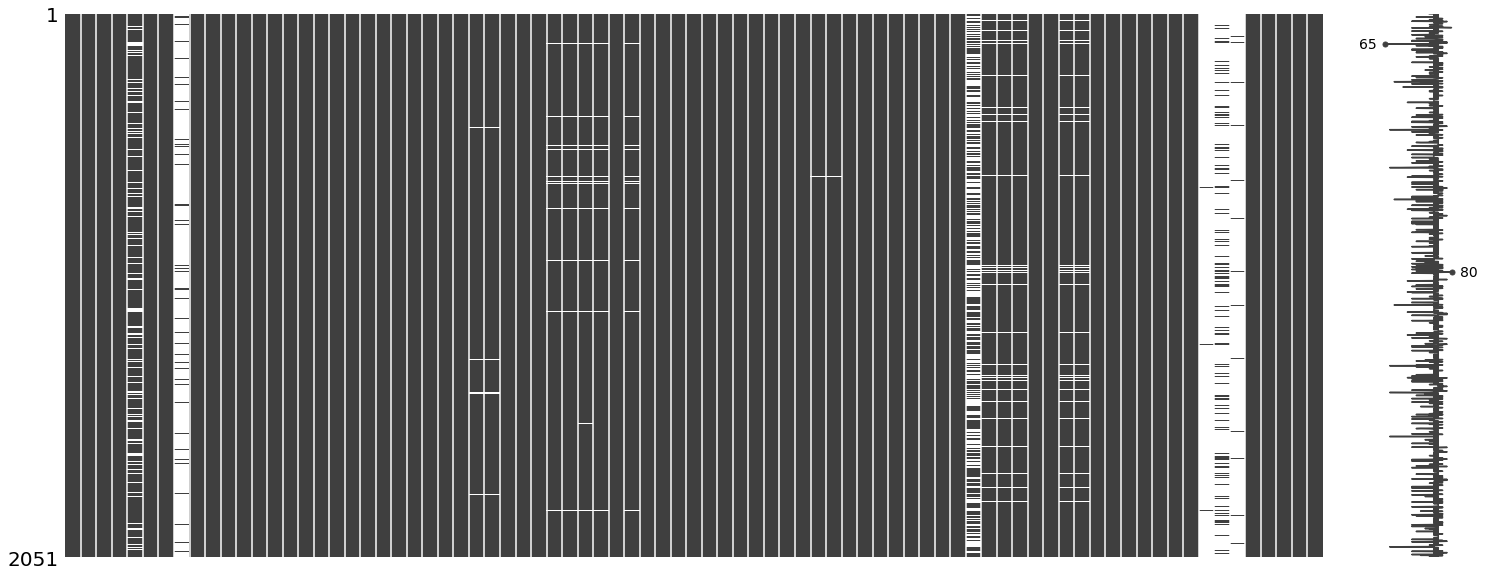

In [8]:
msno.matrix(df);

In [9]:
# lets get a list of how many missing values are in each column with missing values?
def null_check(cols):
    for col in cols:
        if df[col].isnull().sum() > 0:
            print(f'{col} has {df[col].isnull().sum()} null(s)')
            
null_check(columns)

Garage Yr Blt has 114 null(s)
Fireplace Qu has 1000 null(s)
Bsmt Exposure has 58 null(s)
BsmtFin Type 1 has 55 null(s)
Garage Type has 113 null(s)
Alley has 1911 null(s)
Pool QC has 2042 null(s)
Bsmt Half Bath has 2 null(s)
Garage Cond has 114 null(s)
Bsmt Qual has 55 null(s)
Garage Area has 1 null(s)
Garage Finish has 114 null(s)
Fence has 1651 null(s)
BsmtFin Type 2 has 56 null(s)
BsmtFin SF 2 has 1 null(s)
Bsmt Cond has 55 null(s)
Misc Feature has 1986 null(s)
Lot Frontage has 330 null(s)
Garage Qual has 114 null(s)
Total Bsmt SF has 1 null(s)
Garage Cars has 1 null(s)
Bsmt Unf SF has 1 null(s)
Bsmt Full Bath has 2 null(s)
Mas Vnr Area has 22 null(s)
Mas Vnr Type has 22 null(s)
BsmtFin SF 1 has 1 null(s)


Out of all the columns that have null values, the categorical columns can be imputed as 'None' because those houses do not have those features.

In [10]:
cat_cols = [
    'Alley',
    'Mas Vnr Type', 
    'Bsmt Qual', 
    'Bsmt Cond', 
    'Bsmt Exposure', 
    'BsmtFin Type 1', 
    'BsmtFin Type 2', 
    'Fireplace Qu', 
    'Garage Type', 
    'Garage Finish', 
    'Garage Qual', 
    'Garage Cond', 
    'Pool QC', 
    'Fence', 
    'Misc Feature'
]

[df[col].fillna('None', inplace=True) for col in cat_cols]
    
null_check(columns)

Garage Yr Blt has 114 null(s)
Bsmt Half Bath has 2 null(s)
Garage Area has 1 null(s)
BsmtFin SF 2 has 1 null(s)
Lot Frontage has 330 null(s)
Total Bsmt SF has 1 null(s)
Garage Cars has 1 null(s)
Bsmt Unf SF has 1 null(s)
Bsmt Full Bath has 2 null(s)
Mas Vnr Area has 22 null(s)
BsmtFin SF 1 has 1 null(s)


Next the nulls for the basement features can be set to 0 because those houses do not have basements

In [11]:
n_index = df.loc[df['Total Bsmt SF'].isnull()].index
df.loc[n_index, 'Total Bsmt SF'] = 0

n_index = df.loc[df['BsmtFin SF 1'].isnull()].index
df.loc[n_index, 'BsmtFin SF 1'] = 0

n_index = df.loc[df['BsmtFin SF 2'].isnull()].index
df.loc[n_index, 'BsmtFin SF 2'] = 0

n_index = df.loc[df['Bsmt Full Bath'].isnull()].index
df.loc[n_index, 'Bsmt Full Bath'] = 0

n_index = df.loc[df['Bsmt Unf SF'].isnull()].index
df.loc[n_index, 'Bsmt Unf SF'] = 0

n_index = df.loc[df['Bsmt Half Bath'].isnull()].index
df.loc[n_index, 'Bsmt Half Bath'] = 0

In [12]:
null_check(columns)

Garage Yr Blt has 114 null(s)
Garage Area has 1 null(s)
Lot Frontage has 330 null(s)
Garage Cars has 1 null(s)
Mas Vnr Area has 22 null(s)


Now to deal with the Garage Cars and Garage Area nulls. For these nulls I can impute them as the median for the type of garage in the same area. This won't be 100% accurate but it will be a good estimate

In [13]:
df.loc[df['Garage Cars'].isnull()]['Garage Type']

1712    Detchd
Name: Garage Type, dtype: object

In [14]:
df.loc[df['Garage Cars'].isnull()]['Neighborhood']

1712    IDOTRR
Name: Neighborhood, dtype: object

In [15]:
df.loc[(df['Garage Type'] == 'Detchd') & (df['Neighborhood'] == 'IDOTRR')]['Garage Cars'].median()

1.0

In [16]:
df.loc[1712, 'Garage Cars'] = 1

In [17]:
null_check(columns)

Garage Yr Blt has 114 null(s)
Garage Area has 1 null(s)
Lot Frontage has 330 null(s)
Mas Vnr Area has 22 null(s)


In [18]:
df.loc[df['Garage Area'].isnull()]['Garage Type']

1712    Detchd
Name: Garage Type, dtype: object

In [19]:
df.loc[df['Garage Area'].isnull()]['Neighborhood']

1712    IDOTRR
Name: Neighborhood, dtype: object

In [20]:
df.loc[(df['Garage Type'] == 'Detchd') & (df['Neighborhood'] == 'IDOTRR')]['Garage Area'].median()

338.0

In [21]:
df.loc[1712, 'Garage Area'] = 338

In [22]:
null_check(columns)

Garage Yr Blt has 114 null(s)
Lot Frontage has 330 null(s)
Mas Vnr Area has 22 null(s)


In [23]:
n_index = df.loc[df['Mas Vnr Area'].isnull()].index
df.iloc[n_index]['Mas Vnr Type']

22      None
41      None
86      None
212     None
276     None
338     None
431     None
451     None
591     None
844     None
913     None
939     None
1025    None
1244    None
1306    None
1430    None
1434    None
1606    None
1699    None
1815    None
1820    None
1941    None
Name: Mas Vnr Type, dtype: object

Our Mas Vnr Area nulls can be set to 0 because none of them have Masonry Veneer

In [24]:
df.loc[n_index, 'Mas Vnr Area'] = 0
null_check(columns)

Garage Yr Blt has 114 null(s)
Lot Frontage has 330 null(s)


In [25]:
# here we are setting all the nulls . for Garage Year Built to be 0 where there is no garage
n_index = df.loc[(df['Garage Yr Blt'].isnull()) & (df['Garage Type'] == 'None')].index
df.loc[n_index, 'Garage Yr Blt'] = 0

null_check(columns)

Garage Yr Blt has 1 null(s)
Lot Frontage has 330 null(s)


In [26]:
df.loc[df['Garage Yr Blt'].isnull()][['Garage Type', 'Neighborhood']]

,Garage Type,Neighborhood
1712,Detchd,IDOTRR


In [27]:
df.loc[(df['Garage Type'] == 'Detchd') & (df['Neighborhood'] == 'IDOTRR')]['Garage Yr Blt'].median()

1942.0

again we're just going to impute this missing value as the median year for houses in that area with a detached garage

In [28]:
df.loc[1712, 'Garage Yr Blt'] = 1942
null_check(columns)

Lot Frontage has 330 null(s)


We're going to repeat the same process for Lot Frontage as well

In [29]:
# Filling in nulls for Lot Frontage

mini_df = df.loc[df['Lot Frontage'].isnull()][['Lot Area', 'Neighborhood', 'Lot Shape', 'Lot Config']]

while mini_df.shape[0] > 0:
    
    # get the values from the first entry in the list
    nhood = mini_df['Neighborhood'].values[0]
    lshape = mini_df['Lot Shape'].values[0]
    lconfig = mini_df['Lot Config'].values[0]
    
    # get the median Lot Frontage value for places matching the values of the first in the mini df
    n_index = df.loc[(df['Neighborhood'] == nhood) &
                 (df['Lot Shape'] == lshape) &
                 (df['Lot Config'] == lconfig)
                ].index
    
    lfrontage_median = df.loc[n_index, 'Lot Frontage'].median()
    
    # if our Lot Frontage median is nan we will broaden our scopes to get a numerical median
    if math.isnan(lfrontage_median):
        n_index = df.loc[(df['Neighborhood'] == nhood) &
                         (df['Lot Config'] == lconfig)
                        ].index
        lfrontage_median = df.loc[n_index, 'Lot Frontage'].median()
        
    # try a secondary method if our Lot Frontage median is still nan
    if math.isnan(lfrontage_median):
        n_index = df.loc[(df['Lot Shape'] == lshape) &
                         (df['Lot Config'] == lconfig)
                        ].index
        lfrontage_median = df.loc[n_index, 'Lot Frontage'].median()
        
    # impute nulls
    n_index = df.loc[(df['Lot Frontage'].isnull()) &
                 (df['Neighborhood'] == nhood) &
                 (df['Lot Shape'] == lshape) &
                 (df['Lot Config'] == lconfig)
                ].index
    df.loc[n_index, 'Lot Frontage'] = lfrontage_median
    
    # reset mini df
    mini_df = df.loc[df['Lot Frontage'].isnull()][['Lot Area', 'Neighborhood', 'Lot Shape', 'Lot Config']]

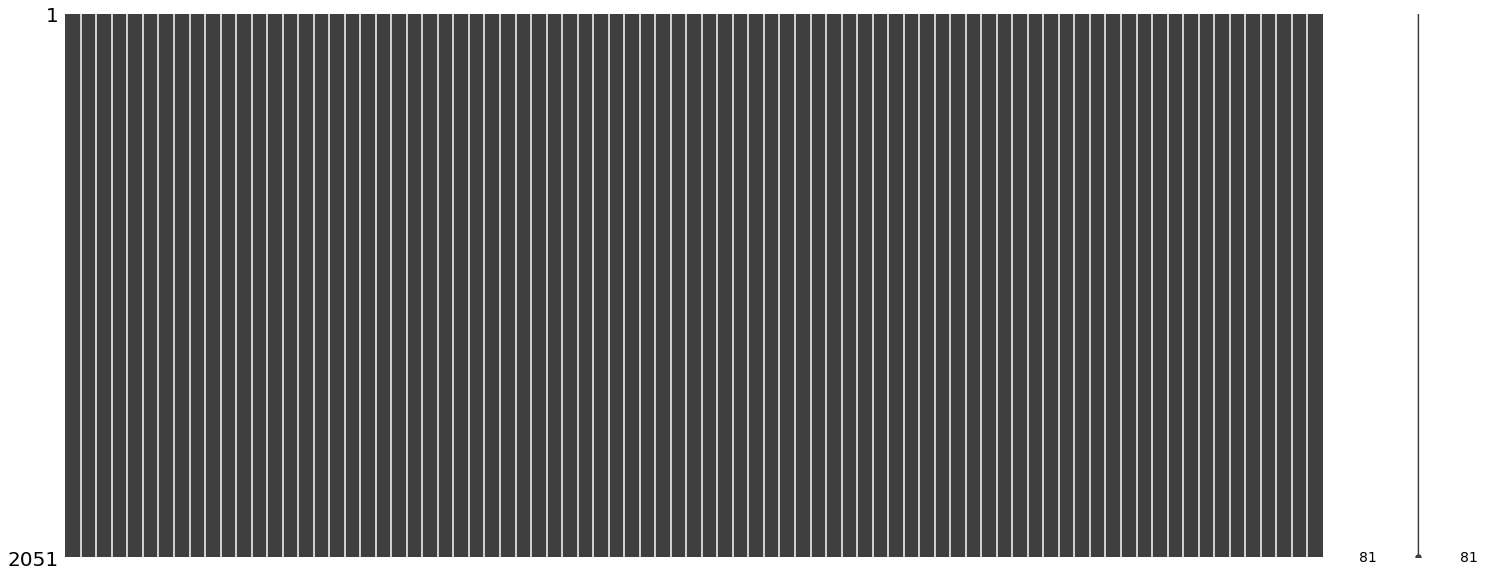

In [30]:
msno.matrix(df);

In [31]:
# save cleaned version
df.to_csv('../../Data/Ames/cleaned.csv', index=False)

___
## EDA

In [32]:
# Let's get a list of all our categorical data
cat_list = [df.dtypes.index[i] for i in range(len(df.dtypes)) if df.dtypes[i] == 'object']

# now we can check each categorical for any anomolies
for col in cat_list:
    print(col)
    print(df[col].unique())
    print('-----------')

MS Zoning
['RL' 'RM' 'FV' 'C (all)' 'A (agr)' 'RH' 'I (all)']
-----------
Street
['Pave' 'Grvl']
-----------
Alley
['None' 'Pave' 'Grvl']
-----------
Lot Shape
['IR1' 'Reg' 'IR2' 'IR3']
-----------
Land Contour
['Lvl' 'HLS' 'Bnk' 'Low']
-----------
Utilities
['AllPub' 'NoSeWa' 'NoSewr']
-----------
Lot Config
['CulDSac' 'Inside' 'Corner' 'FR2' 'FR3']
-----------
Land Slope
['Gtl' 'Sev' 'Mod']
-----------
Neighborhood
['Sawyer' 'SawyerW' 'NAmes' 'Timber' 'Edwards' 'OldTown' 'BrDale'
 'CollgCr' 'Somerst' 'Mitchel' 'StoneBr' 'NridgHt' 'Gilbert' 'Crawfor'
 'IDOTRR' 'NWAmes' 'Veenker' 'MeadowV' 'SWISU' 'NoRidge' 'ClearCr'
 'Blmngtn' 'BrkSide' 'NPkVill' 'Blueste' 'GrnHill' 'Greens' 'Landmrk']
-----------
Condition 1
['RRAe' 'Norm' 'PosA' 'Artery' 'Feedr' 'PosN' 'RRAn' 'RRNe' 'RRNn']
-----------
Condition 2
['Norm' 'RRNn' 'Feedr' 'Artery' 'PosA' 'PosN' 'RRAe' 'RRAn']
-----------
Bldg Type
['1Fam' 'TwnhsE' 'Twnhs' '2fmCon' 'Duplex']
-----------
House Style
['2Story' '1Story' '1.5Fin' 'SFoyer' 

Nothing out of the ordinary when it comes to categorical data. I will eventually turn all of the categorical data into numerical data, but for now I'm just checking if anything is unexpected

In [33]:
# Now let's make a list of our numerical data
num_list = df._get_numeric_data().columns
len(num_list)

39

In [34]:
df.shape

(2051, 81)

In [35]:
len(num_list) + len(cat_list)

81

We've covered all our columns, but I'd like to now remove unwanted columns from our numerical list. i.e. SalePrice (that's what we're trying to predict), Id (not relevant), and PID (also not relevant)

In [36]:
unwanted = ['SalePrice', 'Id', 'PID']
num_list = [ele for ele in num_list if ele not in unwanted]

Now to check the numerical data for any potentially incorrect data.

In [37]:
# check our target
df['SalePrice'].sort_values(ascending=False)

1671    611657
1964    591587
1692    584500
1796    582933
151     556581
         ...  
1518     35311
1292     35000
1309     34900
183      13100
1628     12789
Name: SalePrice, Length: 2051, dtype: int64

In [38]:
# make a function to check the correlation between a list of features and the target
def check_corr(df, features, target):
    
    # combine the features and the target into one list for the heatmap
    hm_list = features + [target]
    
    # plot the correlations between features and the target
    plt.figure(figsize=(2, len(features)/2))
    sns.heatmap(df[hm_list].corr()[[target]].sort_values(by=target, ascending=False),
                vmin=-1,
                vmax=1,
                cmap='coolwarm',
                annot=True
               );

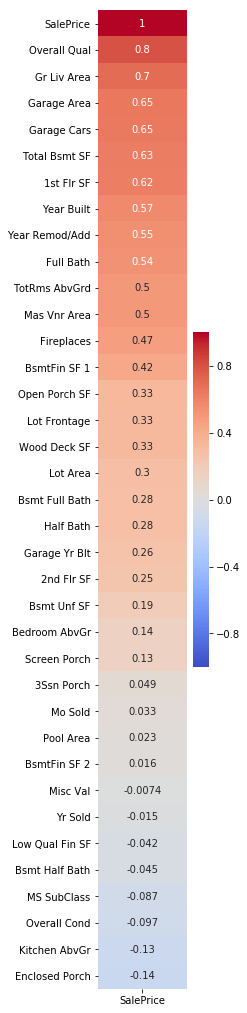

In [39]:
check_corr(df, num_list, 'SalePrice')

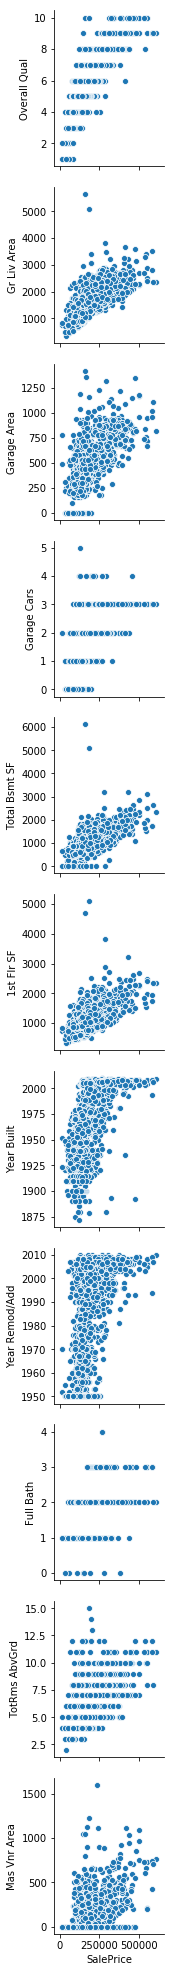

In [40]:
sns.pairplot(df, 
             x_vars=['SalePrice'], 
             y_vars=['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Garage Cars', 'Total Bsmt SF', '1st Flr SF',
                     'Year Built', 'Year Remod/Add', 'Full Bath', 'TotRms AbvGrd', 'Mas Vnr Area'
                    ]
            );

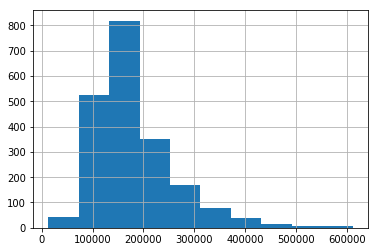

In [41]:
df['SalePrice'].hist();

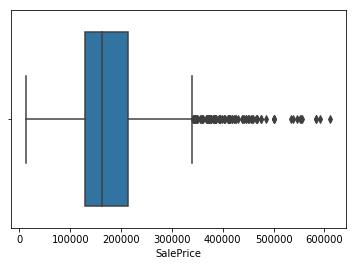

In [42]:
sns.boxplot(df['SalePrice']);

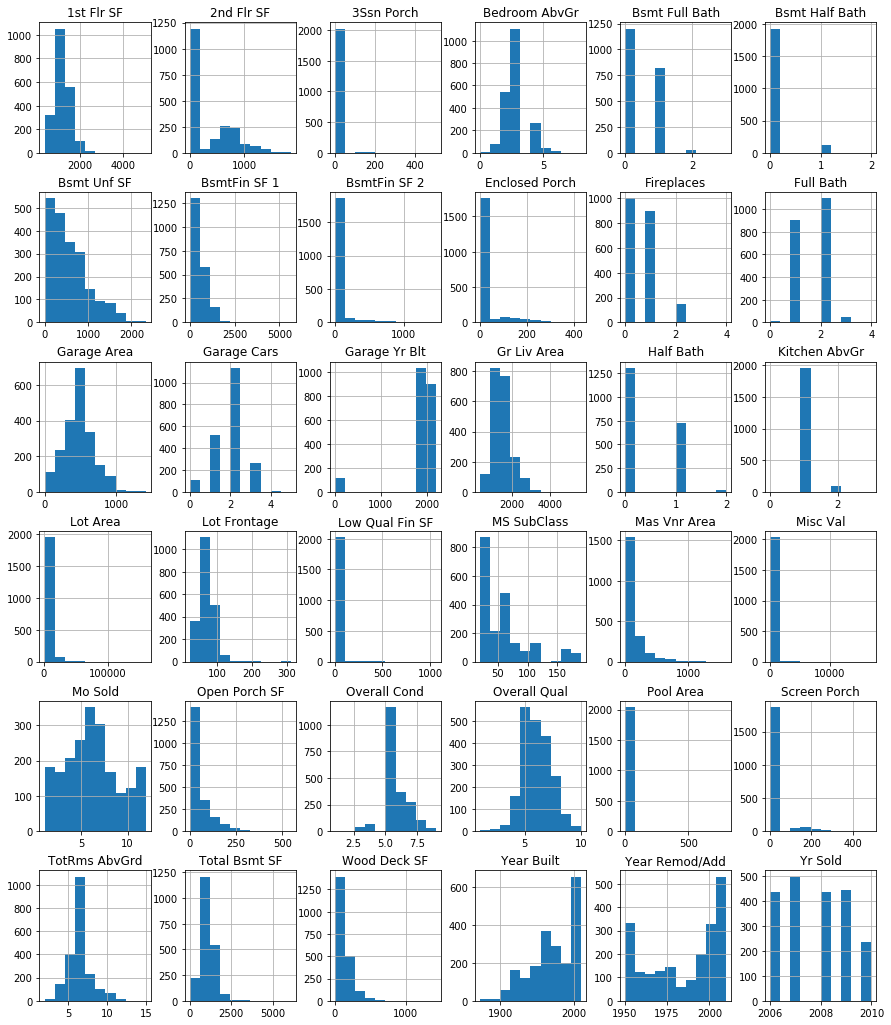

In [43]:
plt.tight_layout;
df[num_list].hist(figsize=(15,18));

Now let's convert all of out categorical data into numerical data

In [44]:
# central air
df['Central Air'] = df['Central Air'].map({'Y':1, 'N':0})

In [45]:
# paved drive
df['Paved Drive'] = df['Paved Drive'].map({'N': 0, 'P': .5, 'Y': 1})

In [46]:
# remove Central Air and Paved Drive from out categorical list because we've already addressed them
unwanted = ['Central Air', 'Paved Drive']
cat_list = [ele for ele in cat_list if ele not in unwanted]

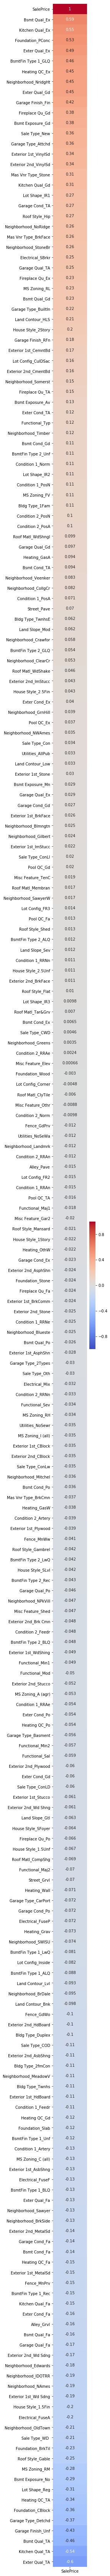

In [47]:
# dummy out our categorical data
df_dummies = pd.get_dummies(df[cat_list])

# I can delete any columns that have 'None' in the name because it's extra data that isn't needed
drop_cols = df_dummies.loc[:,df_dummies.columns.str.contains('None')].columns
df_dummies = df_dummies.drop(columns=drop_cols)

# now I want to check correlation between these and the target
df_dummies['SalePrice'] = df['SalePrice']
check_corr(df_dummies, [ele for ele in df_dummies.columns if ele not in ['SalePrice']], 'SalePrice')

In [48]:
# now to combine both categorical and numerical data
df_combined = pd.concat(
    [df.drop(columns=cat_list).drop(columns=['Id', 'PID']),
     df_dummies.drop(columns=['SalePrice'])],
    axis=1)

df_combined.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Central Air,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,...,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Fireplace Qu_Ex,Fireplace Qu_Fa,Fireplace Qu_Gd,Fireplace Qu_Po,Fireplace Qu_TA,Garage Type_2Types,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Finish_Fin,Garage Finish_RFn,Garage Finish_Unf,Garage Qual_Ex,Garage Qual_Fa,Garage Qual_Gd,Garage Qual_Po,Garage Qual_TA,Garage Cond_Ex,Garage Cond_Fa,Garage Cond_Gd,Garage Cond_Po,Garage Cond_TA,Pool QC_Ex,Pool QC_Fa,Pool QC_Gd,Pool QC_TA,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Misc Feature_Elev,Misc Feature_Gar2,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
0,60,41.5,13517,6,8,1976,2005,289.0,533.0,0.0,192.0,725.0,1,725,754,0,1479,0.0,0.0,2,1,3,1,6,0,1976.0,2.0,475.0,1.0,0,44,0,0,0,0,0,3,2010,130500,0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,60,43.0,11492,7,5,1996,1997,132.0,637.0,0.0,276.0,913.0,1,913,1209,0,2122,1.0,0.0,2,1,4,1,8,1,1997.0,2.0,559.0,1.0,0,74,0,0,0,0,0,4,2009,220000,0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,20,68.0,7922,5,7,1953,2007,0.0,731.0,0.0,326.0,1057.0,1,1057,0,0,1057,1.0,0.0,1,0,3,1,5,0,1953.0,1.0,246.0,1.0,0,52,0,0,0,0,0,1,2010,109000,0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,60,73.0,9802,5,5,2006,2007,0.0,0.0,0.0,384.0,384.0,1,744,700,0,1444,0.0,0.0,2,1,3,1,7,0,2007.0,2.0,400.0,1.0,100,0,0,0,0,0,0,4,2010,174000,0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,50,82.0,14235,6,8,1900,1993,0.0,0.0,0.0,676.0,676.0,1,831,614,0,1445,0.0,0.0,2,0,3,1,6,0,1957.0,2.0,484.0,0.0,0,59,0,0,0,0,0,3,2010,138500,0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


___

## Modeling

In [49]:
# model practice

# set variables
X = df[num_list]
y = df['SalePrice']

# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [50]:
# scale data
ss = StandardScaler()
ss.fit(X_train)
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)

In [51]:
# build model
lr = LinearRegression()

In [52]:
# cross validation
cross_val_score(lr, X_train_sc, y_train, cv=5).mean()

0.771235143343378

In [53]:
cross_val_score(lr, X_test_sc, y_test, cv=5).mean()

0.8783366240460323

In [54]:
lr.fit(X_train_sc, y_train)
lr.score(X_train_sc, y_train)

0.8303232637779796

In [55]:
lr.score(X_test_sc, y_test)

0.8634234734415556

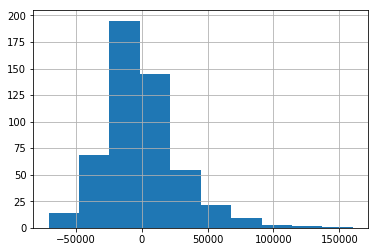

In [56]:
pred = lr.predict(X_test_sc)

resids = y_test - pred

# checking for patterns in residuals, we want normal distributions in our residuals

resids.hist();

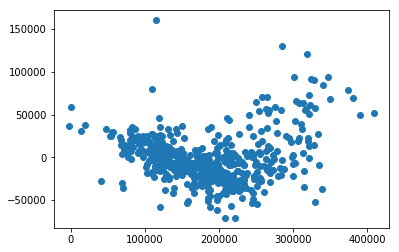

In [57]:
plt.scatter(pred, resids);

In [58]:
# Let's make a function to build a linear model
def make_lr_model(df, features, target):
    # define our X and y (predictors and target)
    X = df[features]
    y = df[target]
    
    # train test split
    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)
    
    # scale the data
    ss = StandardScaler()
    ss.fit(X_train)
    X_train_sc = ss.transform(X_train)
    X_test_sc = ss.transform(X_test)
    
    # inst and fit
    lr = LinearRegression()
    lr.fit(X_train_sc,y_train)
    
    # print out some info about our model
    
    print('--------------------------------------------------')
    print(f'R2 for training score: {lr.score(X_train_sc,y_train)}')
    print(f'R2 for test score: {lr.score(X_test_sc,y_test)}')
    print('--------------------------------------------------')
    print(f'Average Cross Val Score(cv=15): {cross_val_score(lr, X_test_sc, y_test, cv=15).mean()}')
    print('--------------------------------------------------')
    
    # refit the model to our entire data frame
    lr = LinearRegression()
    lr.fit(X,y)
    
    for i, name in enumerate(features):
        print(f'{name}\'s coefficient: {lr.coef_[i]}')
    print('--------------------------------------------------')
    print(f'y intercept: {lr.intercept_}')
    print('--------------------------------------------------')
    print(f'RMSE: {np.sqrt(mean_squared_error(y, lr.predict(X)))}') # root mean square error for entire dataset
    print('--------------------------------------------------')

In [59]:
# model with all our numerical data
make_lr_model(df, num_list, 'SalePrice')

--------------------------------------------------
R2 for training score: 0.8303232637779796
R2 for test score: 0.8634234734415556
--------------------------------------------------
Average Cross Val Score(cv=15): 0.875037103182448
--------------------------------------------------
MS SubClass's coefficient: -152.9737971847373
Lot Frontage's coefficient: -41.0983009148552
Lot Area's coefficient: 0.5681662844978703
Overall Qual's coefficient: 17417.758913556387
Overall Cond's coefficient: 3845.414077497625
Year Built's coefficient: 351.63499160552396
Year Remod/Add's coefficient: 197.97213411023444
Mas Vnr Area's coefficient: 32.76803927878843
BsmtFin SF 1's coefficient: 10.339836440961047
BsmtFin SF 2's coefficient: 1.0510150361649384
Bsmt Unf SF's coefficient: -2.177084695065946
Total Bsmt SF's coefficient: 9.213766780944209
1st Flr SF's coefficient: 22.592150753498185
2nd Flr SF's coefficient: 17.555747357210677
Low Qual Fin SF's coefficient: -12.976618440675342
Gr Liv Area's coeffic

Not a bad place to start. We should focus on feature engineering to help reduce our RMSE and improve our base model.

In [60]:
# model with numerical data that has a correlation with Sale Price of at least .5
features = ['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Garage Cars', 'Total Bsmt SF', '1st Flr SF',
            'Year Built', 'Year Remod/Add', 'Full Bath', 'TotRms AbvGrd', 'Mas Vnr Area']
make_lr_model(df, features, 'SalePrice')

--------------------------------------------------
R2 for training score: 0.7823634774211838
R2 for test score: 0.8400837279812208
--------------------------------------------------
Average Cross Val Score(cv=15): 0.8441015637857981
--------------------------------------------------
Overall Qual's coefficient: 19117.02280078419
Gr Liv Area's coefficient: 45.15480695689348
Garage Area's coefficient: 29.988861342455223
Garage Cars's coefficient: 5890.098980970819
Total Bsmt SF's coefficient: 15.709370198410646
1st Flr SF's coefficient: 17.356316906674508
Year Built's coefficient: 222.72300745815733
Year Remod/Add's coefficient: 376.6660885423525
Full Bath's coefficient: -6121.4891471564415
TotRms AbvGrd's coefficient: -118.70332628217714
Mas Vnr Area's coefficient: 40.08727099676514
--------------------------------------------------
y intercept: -1244623.0465980268
--------------------------------------------------
RMSE: 35640.371328855756
------------------------------------------------

This model actually performed worse, which tells me there are other important features that are not highly correlated to Sale Price

In [61]:
# let's try with all our combined data
make_lr_model(df_combined, [ele for ele in df_combined.columns if ele not in ['SalePrice']], 'SalePrice')

--------------------------------------------------
R2 for training score: 0.9447593871888276
R2 for test score: -1.1431028978017583e+24
--------------------------------------------------
Average Cross Val Score(cv=15): -1.0848410190790439e+25
--------------------------------------------------
MS SubClass's coefficient: -42.35079700464479
Lot Frontage's coefficient: 102.78767353807125
Lot Area's coefficient: 0.818768643617982
Overall Qual's coefficient: 6146.294353134078
Overall Cond's coefficient: 5532.905126955251
Year Built's coefficient: 333.4953244544206
Year Remod/Add's coefficient: 75.42831368232338
Mas Vnr Area's coefficient: 25.170615042801444
BsmtFin SF 1's coefficient: 17.66002999054551
BsmtFin SF 2's coefficient: 10.529581304391513
Bsmt Unf SF's coefficient: -2.1501602119463996
Total Bsmt SF's coefficient: 26.039594810968538
Central Air's coefficient: -4027.990695734559
1st Flr SF's coefficient: 16.20017665935893
2nd Flr SF's coefficient: 24.494113705879045
Low Qual Fin SF's

all though the RMSE score increased, the R2 scores for our training and test sets are so drastically different we can tell that this model suffers from very high varience and is over fit to out trainging data, i.e. a very bad model. This is to be expected because for this model we used every column (except sales price) to predict sale price and that's going to cause our model to be overfit to training data and not accurate when it comes to predicting Sale Price on data this model hasn't seen before. So, not a very practical model.
___
Next we can use Ridge/Lasso to help eleminate extra noise that is messing with our models

In [62]:
def make_ridge_model(df, features, target, lower_a, upper_a):
    """lower_a and upper_a should be ints where 10^lower_a and 10^upper_a are the boundries for alphas"""
    # set up our scaler
    ss = StandardScaler()
    
    # define our X and y
    X = df[features]
    y = df[target]
    
    # train test split
    X_train, X_holdout, y_train, y_holdout = train_test_split(X,y, random_state=42)
    
    # scale our Xs
    X_train_sc = ss.fit_transform(X_train)
    X_holdout_sc = ss.transform(X_holdout)
    
    # make our list of alpha values to check
    ridge_alphas = np.logspace(lower_a, upper_a, 100)
    
    # inst and fit
    ridge = RidgeCV(alphas=ridge_alphas, cv=5)
    ridge.fit(X_train_sc, y_train)
    
    # print out some info about our model
    
    print('--------------------------------------------------')
    print(f'R2 for training score: {ridge.score(X_train_sc,y_train)}')
    print(f'R2 for holdout score: {ridge.score(X_holdout_sc,y_holdout)}')
    print('--------------------------------------------------')
    print(f'Optimal Alpha (based off split training data): {ridge.alpha_}')
    print('--------------------------------------------------')
    
    # refit the model to our entire data frame
    ridge_opt = Ridge(alpha=ridge.alpha_)
    ridge_opt.fit(X,y)
    
    for i, name in enumerate(features):
        print(f'{name}\'s scaled coefficient: {ridge_opt.coef_[i]}')
    print('--------------------------------------------------')
    print(f'y intercept: {ridge_opt.intercept_}')
    print('--------------------------------------------------')
    print(f'RMSE: {np.sqrt(mean_squared_error(y, ridge_opt.predict(X)))}') # root mean square error for entire dataset
    print('--------------------------------------------------')

In [63]:
def make_lasso_model(df, features, target, lower_a, upper_a):
    # set up our scaler
    ss = StandardScaler()
    
    # define our X and y
    X = df[features]
    y = df[target]
    
    # train test split
    X_train, X_holdout, y_train, y_holdout = train_test_split(X,y, random_state=42)
    
    # scale our Xs
    X_train_sc = ss.fit_transform(X_train)
    X_holdout_sc = ss.transform(X_holdout)
    
    # make our list of alphas to check
    lasso_alphas = np.linspace(lower_a, upper_a ,200)
    
    # inst and fit
    lasso = LassoCV(alphas=lasso_alphas, cv=5)
    lasso.fit(X_train_sc, y_train)
    
    # print out some info about our model
    
    print('--------------------------------------------------')
    print(f'R2 for training score: {lasso.score(X_train_sc,y_train)}')
    print(f'R2 for holdout score: {lasso.score(X_holdout_sc,y_holdout)}')
    print('--------------------------------------------------')
    print(f'Optimal Alpha (based off split training data): {lasso.alpha_}')
    print('--------------------------------------------------')
    
    # refit to our whole data set
    lasso_opt = Lasso(alpha=lasso.alpha_)
    lasso_opt.fit(X,y)
    
    for i, name in enumerate(features):
        print(f'{name}\'s scaled coefficient: {lasso_opt.coef_[i]}')
    print('--------------------------------------------------')
    print(f'y intercept: {lasso_opt.intercept_}')
    print('--------------------------------------------------')
    print(f'RMSE: {np.sqrt(mean_squared_error(y, lasso_opt.predict(X)))}') # root mean square error for entire dataset
    print('--------------------------------------------------')

In [64]:
make_ridge_model(df_combined, [ele for ele in df_combined.columns if ele not in ['SalePrice']], 'SalePrice', 2, 3)

--------------------------------------------------
R2 for training score: 0.9233448401363127
R2 for holdout score: 0.9078994518783559
--------------------------------------------------
Optimal Alpha (based off split training data): 792.4828983539178
--------------------------------------------------
MS SubClass's scaled coefficient: -144.95786968907612
Lot Frontage's scaled coefficient: -57.9902183600398
Lot Area's scaled coefficient: 0.4993553127504415
Overall Qual's scaled coefficient: 10184.857145492038
Overall Cond's scaled coefficient: 3567.6810061135225
Year Built's scaled coefficient: 408.455829805564
Year Remod/Add's scaled coefficient: 253.77809653226782
Mas Vnr Area's scaled coefficient: 35.91508938944919
BsmtFin SF 1's scaled coefficient: 10.758728811901298
BsmtFin SF 2's scaled coefficient: 5.281954815888967
Bsmt Unf SF's scaled coefficient: -2.5203100580491613
Total Bsmt SF's scaled coefficient: 13.520373576849657
Central Air's scaled coefficient: -260.6477619891725
1st Fl

In [65]:
make_lasso_model(df_combined, [ele for ele in df_combined.columns if ele not in ['SalePrice']], 'SalePrice', 500, 1200)

--------------------------------------------------
R2 for training score: 0.9320790148234813
R2 for holdout score: 0.9259340987652871
--------------------------------------------------
Optimal Alpha (based off split training data): 841.2060301507538
--------------------------------------------------
MS SubClass's scaled coefficient: -160.4083186371132
Lot Frontage's scaled coefficient: -70.91999246344145
Lot Area's scaled coefficient: 0.6078098496661801
Overall Qual's scaled coefficient: 13900.116031290796
Overall Cond's scaled coefficient: 3519.566342566189
Year Built's scaled coefficient: 380.4988203642151
Year Remod/Add's scaled coefficient: 200.78573149228222
Mas Vnr Area's scaled coefficient: 24.053907814764276
BsmtFin SF 1's scaled coefficient: 17.309406925226487
BsmtFin SF 2's scaled coefficient: 10.770703534455215
Bsmt Unf SF's scaled coefficient: 4.059311376464493
Total Bsmt SF's scaled coefficient: 3.0785964866968376
Central Air's scaled coefficient: -0.0
1st Flr SF's scaled 